In [23]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
# Pricing a European option using Black-Scholes formula and Monte Carlo simulations 
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier

In [10]:
# Complete the following functions
def BS_european_price(S0, K, T, r, sigma):
  # --------- Insert your code here --------- #
    N = norm.cdf

    d1 = (np.log(S0/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    c = S0 * N(d1) - K * np.exp(-r*T)* N(d2)
    p = K*np.exp(-r*T)*N(-d2) - S0*N(-d1)

    return c, p

In [5]:
def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
  # --------- Insert your code here --------- #
    paths = np.zeros((numSteps + 1, numPaths))
    dT = T / numSteps
    paths[0] = [S0] * numPaths 
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma**2) * dT 
                                                                   + sigma * np.sqrt(dT) * np.random.normal(0,1))
    CallPayoffT = np.maximum(paths[numSteps,:] - K,0)
    PutPayoffT = np.maximum(K - paths[numSteps,:], 0)
    c = np.mean(CallPayoffT) * np.exp(-r * T)
    p = np.mean(PutPayoffT) * np.exp(-r * T)
    
    return c, p, paths


In [6]:
def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
  # --------- Insert your code here --------- #
    paths = np.zeros((numSteps + 1, numPaths))
    dT = T / numSteps
    paths[0] = [S0] * numPaths 
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma**2) * dT 
                                                                   + sigma * np.sqrt(dT) * np.random.normal(0,1))
    
    knock_in = []
    for i in range(numPaths):
        if any(paths[:,i] > Sb):
            knock_in.append(1)
        else: 
            knock_in.append(0)  
    CallPayoffT = knock_in * np.maximum(paths[numSteps,:] - K,0)
    PutPayoffT = knock_in * np.maximum(K - paths[numSteps,:], 0)
    c = np.mean(CallPayoffT) * np.exp(-r * T)
    p = np.mean(PutPayoffT) * np.exp(-r * T) 

    return c, p


In [3]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = 10;
numPaths = 1000000;

In [11]:
# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = \
  BS_european_price (S0, K, T, r, sigma)

In [13]:
# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step, MC_European_Price_1_step_paths = \
  MC_european_price (S0, K, T, r, mu, sigma, 1, numPaths)

In [14]:
# Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step, MC_European_Price_multi_step_paths = \
  MC_european_price (S0, K, T, r, mu, sigma, numSteps, numPaths)

In [15]:
# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = \
  MC_barrier_knockin_price (S0, Sb, K, T, r, mu, sigma, 1, numPaths)

In [16]:
# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = \
  MC_barrier_knockin_price (S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)


In [17]:
print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step)) 
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step)) 
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 8.001259340113721
One-step MC price of an European put option is 7.906470307715726
Multi-step MC price of an European call option is 8.038198607384464
Multi-step MC price of an European put option is 7.8964594478650465
One-step MC price of an Barrier call option is 7.79236567817673
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 7.962824322069629
Multi-step MC price of an Barrier put option is 1.1961582720249182


In [18]:
# Implement your one-step Monte Carlo pricing procedure for Barrier option with volatility increased by 10% 
callMC_Barrier_Knockin_Price_1_step_increase, putMC_Barrier_Knockin_Price_1_step_increase = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 1.1*sigma, 1, numPaths)

# Implement your one-step Monte Carlo pricing procedure for Barrier option with volatility decreased by 10% 
callMC_Barrier_Knockin_Price_1_step_decrease, putMC_Barrier_Knockin_Price_1_step_decrease = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 0.9*sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option with volatility increased by 10% 
callMC_Barrier_Knockin_Price_multi_step_increase, putMC_Barrier_Knockin_Price_multi_step_increase = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 1.1*sigma, numSteps, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option with volatility decreased by 10% 
callMC_Barrier_Knockin_Price_multi_step_decrease, putMC_Barrier_Knockin_Price_multi_step_decrease = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 0.9*sigma, numSteps, numPaths)

In [19]:
print('One-step MC price of an Barrier call option with volatility increased by 10% is ' + str(callMC_Barrier_Knockin_Price_1_step_increase)) 
print('One-step MC price of an Barrier put option with volatility increased by 10%is ' + str(putMC_Barrier_Knockin_Price_1_step_increase)) 
print('One-step MC price of an Barrier call option with volatility decreased by 10% is ' + str(callMC_Barrier_Knockin_Price_1_step_decrease)) 
print('One-step MC price of an Barrier put option with volatility decreased by 10%is ' + str(putMC_Barrier_Knockin_Price_1_step_decrease)) 
print('Multi-step MC price of an Barrier call option with volatility increased by 10% is ' + str(callMC_Barrier_Knockin_Price_multi_step_increase)) 
print('Multi-step MC price of an Barrier put option with volatility increased by 10% is ' + str(putMC_Barrier_Knockin_Price_multi_step_increase))
print('Multi-step MC price of an Barrier call option with volatility decreased by 10% is ' + str(callMC_Barrier_Knockin_Price_multi_step_decrease)) 
print('Multi-step MC price of an Barrier put option with volatility decreased by 10% is ' + str(putMC_Barrier_Knockin_Price_multi_step_decrease))

One-step MC price of an Barrier call option with volatility increased by 10% is 8.596595766291738
One-step MC price of an Barrier put option with volatility increased by 10%is 0.0
One-step MC price of an Barrier call option with volatility decreased by 10% is 7.004704752276939
One-step MC price of an Barrier put option with volatility decreased by 10%is 0.0
Multi-step MC price of an Barrier call option with volatility increased by 10% is 8.780453610142908
Multi-step MC price of an Barrier put option with volatility increased by 10% is 1.4993908839547614
Multi-step MC price of an Barrier call option with volatility decreased by 10% is 7.148664256912547
Multi-step MC price of an Barrier put option with volatility decreased by 10% is 0.9146726632558413


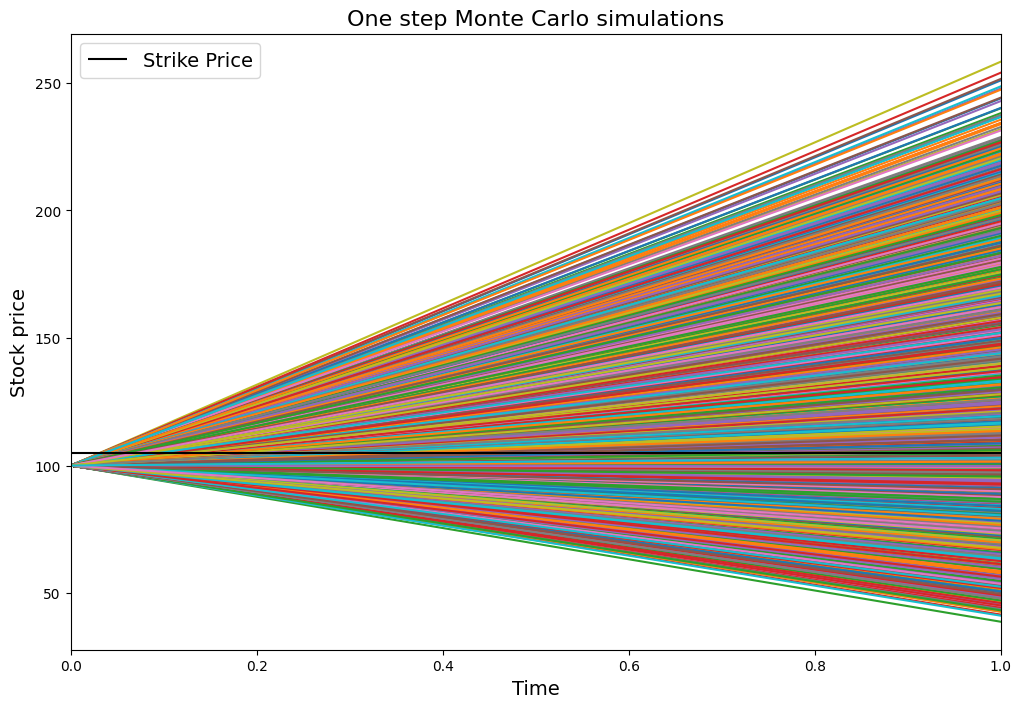

In [24]:
# Plot results
# --------- Insert your code here --------- #
plt.figure(figsize=(12,8))
plt.plot(MC_European_Price_1_step_paths)
plt.hlines(K, colors ="k", xmin=0,
           xmax=1,
           linestyle = 'solid',
           zorder=100,
           label="Strike Price")
plt.xlim((0,1))
plt.xlabel('Time', fontsize=14)
plt.ylabel('Stock price', fontsize=14)
plt.title('One step Monte Carlo simulations', fontsize=16)
plt.legend(loc="best", fontsize=14)
plt.savefig('1s_mc_paths.png')
plt.show()

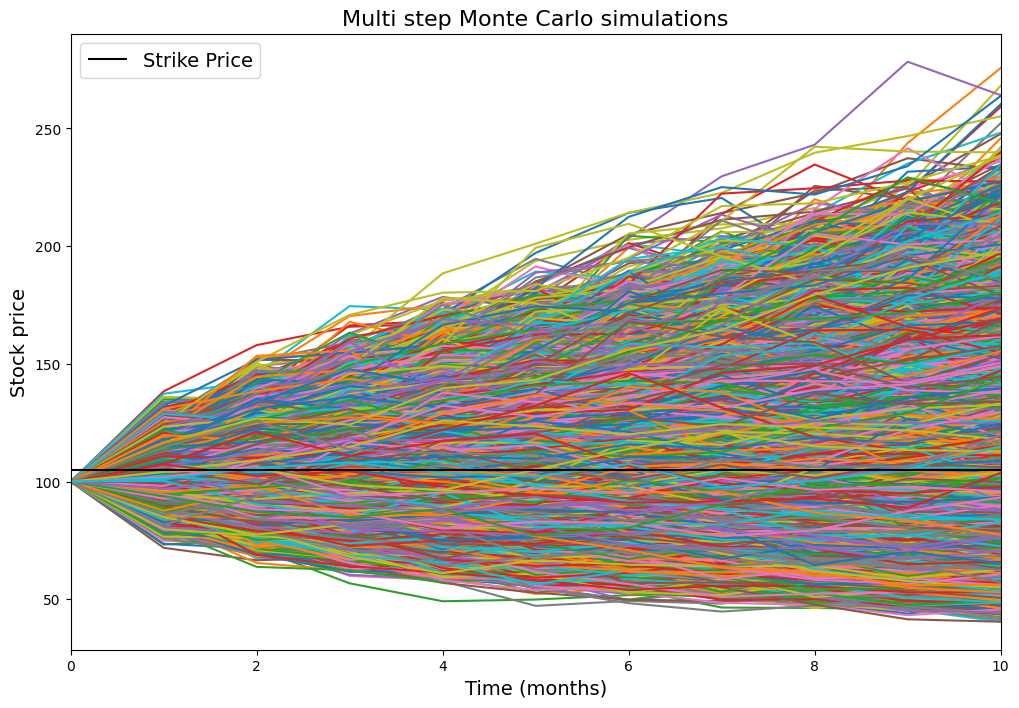

In [25]:
# Plot results
# --------- Insert your code here --------- #
plt.figure(figsize=(12,8))
plt.plot(MC_European_Price_multi_step_paths)
plt.hlines(K, colors ="k", xmin=0,
           xmax=numSteps,
           linestyle = 'solid',
           zorder=100,
           label="Strike Price")
plt.xlim((0, numSteps))
plt.xlabel('Time (months)', fontsize=14)
plt.ylabel('Stock price', fontsize=14)
plt.title('Multi step Monte Carlo simulations', fontsize=16)
plt.legend(loc="best", fontsize=14)
plt.savefig('multis_mc_paths.png')
plt.show()

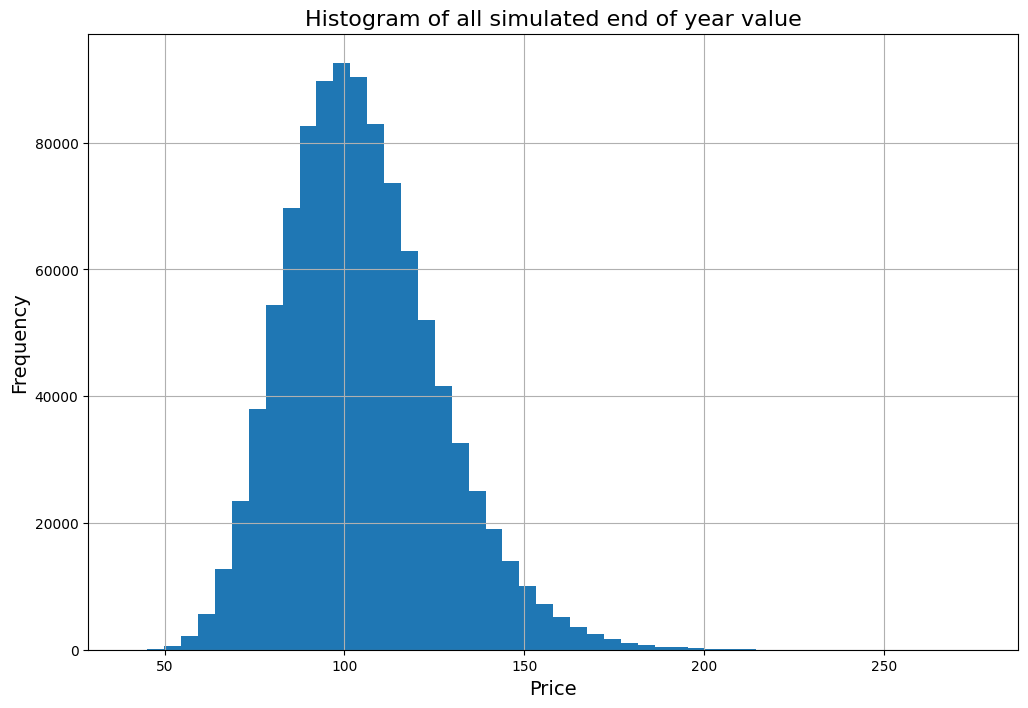

In [27]:
fig = plt.figure(figsize=(12,8))
plt.hist(MC_European_Price_multi_step_paths[numSteps,:], bins=50)
plt.title('Histogram of all simulated end of year value', fontsize=16)
plt.grid(True)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.savefig('hist.png')
plt.show()

In [28]:
steplist = [2, 4, 6, 12]
pathlist = [100, 10000, 100000, 500000]

In [34]:
#testing different number of paths for One-step MC price of an European option
call_result_MCEU1 = []
put_result_MCEU1 = []

for xpaths in pathlist:
    c, p, paths = \
    MC_european_price (S0, K, T, r, mu, sigma, 1, xpaths)
    call_result_MCEU1.append(c)
    put_result_MCEU1.append(p)
call_result_MCEU1_df = pd.DataFrame(call_result_MCEU1, index=pathlist, columns = ["1 step"])
put_result_MCEU1_df = pd.DataFrame(put_result_MCEU1, index=pathlist, columns = ["1 step"])

In [35]:
call_result_MCEU1_df

,1 step
100,7.004473
10000,7.987066
100000,8.038942
500000,8.005663


In [47]:
(call_result_MCEU1_df - callMC_European_Price_1_step)/callMC_European_Price_1_step

,1 step
100,-0.124579
10000,-0.001774
100000,0.004710
500000,0.000550


In [36]:
put_result_MCEU1_df

,1 step
100,7.684638
10000,7.974685
100000,7.845548
500000,7.887226


In [48]:
(put_result_MCEU1_df - putMC_European_Price_1_step)/putMC_European_Price_1_step

,1 step
100,-0.028057
10000,0.008628
100000,-0.007705
500000,-0.002434


In [37]:
#testing different number of steps and paths for Multi-step MC price of an European option

call_result_MCEUM = []
put_result_MCEUM = []

for xsteps in steplist:
    row_c=[]
    row_p=[]
    for xpaths in pathlist:
        c, p, paths = MC_european_price (S0, K, T, r, mu, sigma, xsteps, xpaths)
        row_c.append(c)
        row_p.append(p)
    call_result_MCEUM.append(row_c)
    put_result_MCEUM.append(row_p)

call_result_MCEUM_df = pd.DataFrame(call_result_MCEUM, index=steplist, columns = pathlist)
put_result_MCEUM_df = pd.DataFrame(put_result_MCEUM, index=steplist, columns = pathlist)

In [38]:
call_result_MCEUM_df

,100,10000,100000,500000
2,9.521275,7.957876,8.024593,8.013259
4,8.290649,8.042224,7.965159,7.999353
6,9.609415,8.282620,8.032527,8.003607
12,6.950463,8.211462,8.054353,7.992649


In [49]:
(call_result_MCEUM_df - callMC_European_Price_multi_step)/callMC_European_Price_multi_step

,100,10000,100000,500000
2,0.184504,-0.009993,-0.001693,-0.003103
4,0.031406,0.000501,-0.009087,-0.004833
6,0.195469,0.030408,-0.000706,-0.004303
12,-0.135321,0.021555,0.002010,-0.005667


In [39]:
put_result_MCEUM_df 

,100,10000,100000,500000
2,6.791489,7.896745,7.898663,7.909782
4,8.493734,7.933098,7.918115,7.915463
6,7.638409,7.695509,7.877342,7.911993
12,7.746204,7.854882,7.921101,7.912640


In [50]:
(put_result_MCEUM_df - putMC_European_Price_multi_step)/putMC_European_Price_multi_step

,100,10000,100000,500000
2,-0.139932,0.000036,0.000279,0.001687
4,0.075638,0.004640,0.002742,0.002407
6,-0.032679,-0.025448,-0.002421,0.001967
12,-0.019028,-0.005265,0.003121,0.002049


In [40]:
#testing different number of paths for One-step MC price of an Barrier option
call_result_MCB1 = []
put_result_MCB1 = []

for xpaths in pathlist:
    c, p = MC_barrier_knockin_price (S0, Sb, K, T, r, mu, sigma, 1, xpaths)
    call_result_MCB1.append(c)
    put_result_MCB1.append(p)
call_result_MCB1_df = pd.DataFrame(call_result_MCB1, index=pathlist, columns = ["1 step"])
put_result_MCB1_df = pd.DataFrame(put_result_MCB1, index=pathlist, columns = ["1 step"])

In [42]:
call_result_MCB1_df

,1 step
100,4.920083
10000,7.591503
100000,7.874062
500000,7.847544


In [51]:
(call_result_MCB1_df - callMC_Barrier_Knockin_Price_1_step)/callMC_Barrier_Knockin_Price_1_step

,1 step
100,-0.368602
10000,-0.025777
100000,0.010484
500000,0.007081


In [43]:
put_result_MCB1_df

,1 step
100,0.0
10000,0.0
100000,0.0
500000,0.0


In [52]:
(put_result_MCB1_df - putMC_Barrier_Knockin_Price_1_step)/putMC_Barrier_Knockin_Price_1_step

,1 step
100,NaN
10000,NaN
100000,NaN
500000,NaN


In [41]:
#testing different number of steps and paths for Multi-step MC price of an Barrier option

call_result_MCBM = []
put_result_MCBM = []

for xsteps in steplist:
    row_c=[]
    row_p=[]
    for xpaths in pathlist:
        c, p = MC_barrier_knockin_price (S0, Sb, K, T, r, mu, sigma, xsteps, xpaths)
        row_c.append(c)
        row_p.append(p)
    call_result_MCBM.append(row_c)
    put_result_MCBM.append(row_p)

call_result_MCBM_df = pd.DataFrame(call_result_MCBM, index=steplist, columns = pathlist)
put_result_MCBM_df = pd.DataFrame(put_result_MCBM, index=steplist, columns = pathlist)

In [44]:
call_result_MCBM_df

,100,10000,100000,500000
2,6.178148,7.871162,7.782085,7.841932
4,6.528863,7.833549,7.882683,7.882468
6,7.026739,7.999666,7.991042,7.927983
12,6.558495,8.050560,7.963872,7.935607


In [54]:
(call_result_MCBM_df - callMC_Barrier_Knockin_Price_multi_step)/callMC_Barrier_Knockin_Price_multi_step

,100,10000,100000,500000
2,-0.224126,-0.011511,-0.022698,-0.015182
4,-0.180082,-0.016235,-0.010064,-0.010091
6,-0.117557,0.004627,0.003544,-0.004376
12,-0.176361,0.011018,0.000132,-0.003418


In [45]:
put_result_MCBM_df 

,100,10000,100000,500000
2,0.766946,0.350613,0.372333,0.370291
4,0.841763,0.719602,0.770247,0.760389
6,1.220924,0.994237,0.959329,0.962573
12,1.516692,1.290839,1.272506,1.262006


In [55]:
(put_result_MCBM_df - putMC_Barrier_Knockin_Price_multi_step)/putMC_Barrier_Knockin_Price_multi_step

,100,10000,100000,500000
2,-0.358826,-0.706884,-0.688726,-0.690433
4,-0.296278,-0.398406,-0.356066,-0.364307
6,0.020704,-0.168808,-0.197991,-0.195280
12,0.267969,0.079154,0.063827,0.055049


In [59]:
# Strategies to obtain the same prices 
# Call option
paths_range = [100000, 1000000, 5000000]
steps_range = [2,6,12]

# Set threshold 
call_threshold = call_BS_European_Price
put_threshold = putBS_European_Price

for num_step in range(len(steps_range)): 
    for num_path in range(len(paths_range)): 
        callMC_European_Price_step_path, putMC_European_Price_step_path, MC_European_Price_step_path = \
        MC_european_price(S0, K, T, r, mu, sigma, steps_range[num_step], paths_range[num_path])
        
        if np.round(callMC_European_Price_step_path,2) == np.round(call_threshold,2): 
            call_optimal = callMC_European_Price_step_path
            path_optimal = paths_range[num_path]
            step_optimal = steps_range[num_step]
            break # break here
            

In [60]:
print('Call option optimal path:',(path_optimal))
print('Call option optimal step:',(step_optimal))
print('MC Call option price:',(call_optimal))

Call option optimal path: 1000000
Call option optimal step: 12
MC Call option price: 8.023785389135037


In [61]:
# Put option 
for num_step in range(len(steps_range)): 
    for num_path in range(len(paths_range)): 
        callMC_European_Price_step_path, putMC_European_Price_step_path, MC_European_Price_step_path = \
        MC_european_price(S0, K, T, r, mu, sigma, steps_range[num_step], paths_range[num_path])
        
        if np.round(putMC_European_Price_step_path,2) == np.round(put_threshold,2): 
            put_optimal = putMC_European_Price_step_path
            path_optimal = paths_range[num_path]
            step_optimal = steps_range[num_step]
            break # break here

In [62]:
print('Put option optimal path:',(path_optimal))
print('Put option optimal step:',(step_optimal))
print('MC Put option price:',(put_optimal))

Put option optimal path: 1000000
Put option optimal step: 6
MC Put option price: 7.904089444588627
